# Data notebook

---

We handle the data here.

## Imports

In [15]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [34]:
rho = "1.0"

In [35]:
data = sio.loadmat(f"/home/azouaoui/CH4/hsi_unmixing/data/MixedRatio_rho{rho}.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'E', 'A'])

In [36]:
D = sio.loadmat("/home/azouaoui/CH4/HySUPP/data/Sim1.mat")["D"]

In [37]:
D.shape

(224, 498)

In [38]:
Y = data["Y"]
A = data["A"]
E = data["E"]

In [39]:
L, M = D.shape
LE, p = E.shape
assert L == LE
LY, N = Y.shape
pA, NA = A.shape
assert p == pA
assert N == NA
H, W = 25, 40
assert H * W == N

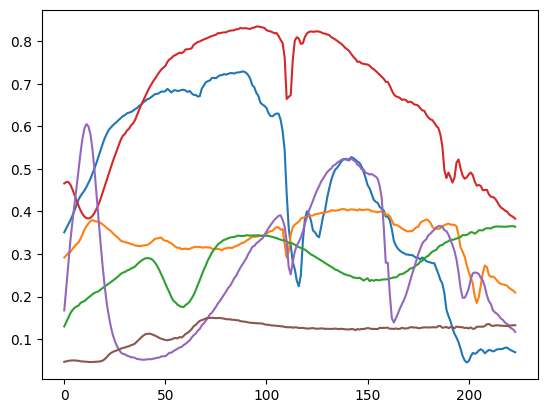

In [40]:
plt.plot(E);

In [41]:
# TODO find indices of endmembers from the USGS library
indices = []
for pp in range(p):
    x = E[:, pp]
    dist = []
    for mm in range(M):
        dist.append(np.linalg.norm(D[:, mm] - x))
    ind = np.argmin(dist)
    print(ind)
    indices.append(ind)

162
319
210
138
97
197


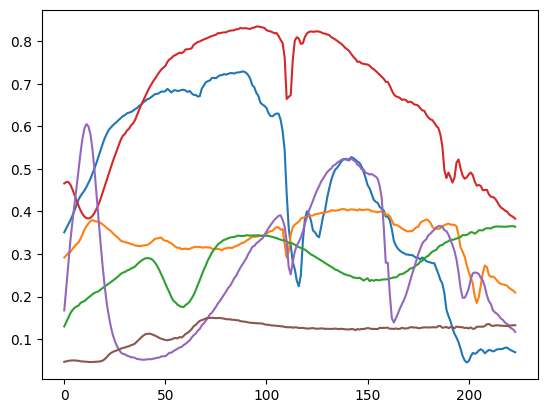

In [42]:
plt.plot(D[:, indices]);

In [43]:
new_data = {"Y": Y, "E": E, "A": A, "H": H, "W": W, "L": L, "p": p, "M": M, "N": N, "D": D, "index": indices}
sio.savemat(f"../data/MixedRatio_rho{rho}.mat", new_data)

## Library endmembers names

In [44]:
USGS = sio.loadmat("/home/azouaoui/USGS_1995_Library.mat")

In [45]:
USGS.keys()

dict_keys(['__header__', '__version__', '__globals__', 'names', 'datalib'])

In [46]:
names = USGS["names"]
names.shape

(501, 29)

In [47]:
dd = USGS["datalib"]
dd.shape

(224, 501)

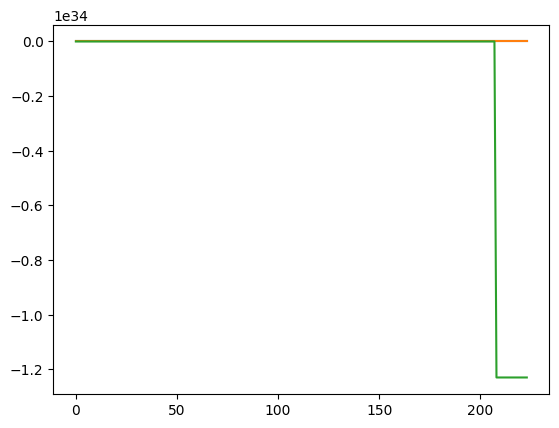

In [48]:
plt.plot(dd[:, :3])

In [50]:
names[:3]

array([[ 87,  97, 118, 101, 108, 101, 110, 103, 116, 104, 115,  32, 105,
        110,  32, 109, 105,  99, 114, 111, 110, 115,  32,  50,  50,  52,
         99,  32,  10],
       [ 82, 101, 115, 111, 108, 117, 116, 105, 111, 110,  32,  32, 105,
        110,  32, 109, 105,  99, 114, 111, 110, 115,  32,  50,  50,  52,
         99,  32,  10],
       [ 68,  97, 116,  97,  32, 118,  97, 108, 117, 101,  32,  61,  32,
         99, 104,  97, 110, 110, 101, 108,  32, 110, 117, 109,  98, 101,
        114,  32,  10]], dtype=uint8)

In [63]:
for index in indices:
    name = names[index + 3]
    print("".join([chr(nn) for nn in name]))    

Goethite WS222              

Niter GDS43 (K-Saltpeter)   

Hypersthene PYX02.f 60um    

Endellite GDS16             

Clinochlore GDS158          

Heulandite NMNH84534        



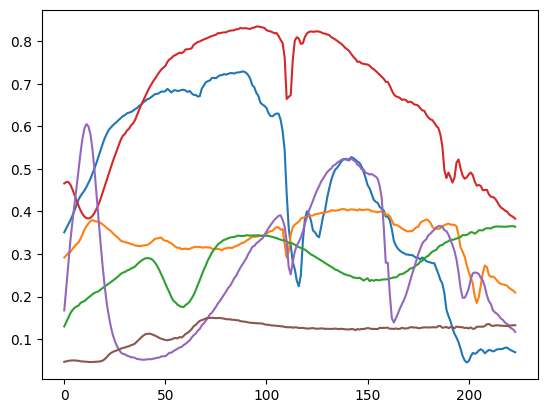

In [64]:
plt.plot(D[:, indices]);